# 第7章 数据清洗与准备 

## 7.1处理缺失数据 

In [3]:
import pandas as pd
import numpy as np

In [7]:
#数值型数据pandans使用浮点值NaN来表示缺失值
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
print(string_data.isnull())
string_data[0] = None
string_data.isnull() #可检测np.nan、None

0    False
1    False
2     True
3    False
dtype: bool


0     True
1    False
2     True
3    False
dtype: bool

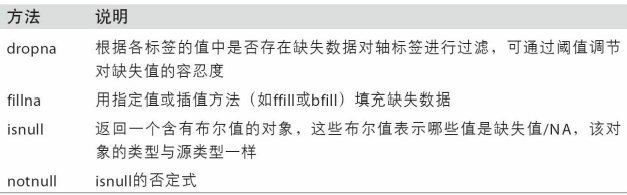

#### 滤除缺失数据 

In [22]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
print(data.dropna())
print(data[data.notnull()])

0    1.0
2    3.5
4    7.0
dtype: float64
0    1.0
2    3.5
4    7.0
dtype: float64


In [11]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna() #deopna默认丢弃任何含有缺失值的行
print(data)
cleaned

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0


,0,1,2
0,1.0,6.5,3.0


In [17]:
print(data.dropna(how="all")) #只丢弃全为NA的行
data[4] = NA
data.dropna(axis=1, how="all") #axis=1来对列进行操作

     0    1    2   4
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
3  NaN  6.5  3.0 NaN


,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [21]:
#DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#thresh:Keep only the rows with at least many non-NA values.
#subset:Define in which columns to look for missing values
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
print(df)
print(df.dropna())
df.dropna(thresh=2)

          0         1         2
0  0.072154       NaN       NaN
1 -0.094189       NaN       NaN
2  0.280868       NaN  0.596479
3  0.026737       NaN  0.097294
4  0.764041  0.298268  1.355793
5 -0.350796  0.497573 -0.636359
6  0.311740 -1.836106  0.180388
          0         1         2
4  0.764041  0.298268  1.355793
5 -0.350796  0.497573 -0.636359
6  0.311740 -1.836106  0.180388


,0,1,2
2,0.280868,NaN,0.596479
3,0.026737,NaN,0.097294
4,0.764041,0.298268,1.355793
5,-0.350796,0.497573,-0.636359
6,0.311740,-1.836106,0.180388


#### 填充缺失数据 

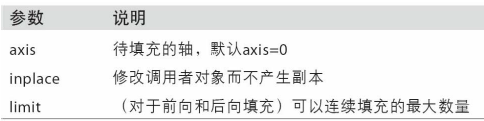

In [25]:
df.fillna({1: 0.5, 2: 0}) #1那列 填充0.5  2那列填充0

,0,1,2
0,0.072154,0.500000,0.000000
1,-0.094189,0.500000,0.000000
2,0.280868,0.500000,0.596479
3,0.026737,0.500000,0.097294
4,0.764041,0.298268,1.355793
5,-0.350796,0.497573,-0.636359
6,0.311740,-1.836106,0.180388


In [27]:
_ = df.fillna(0, inplace=True) #fillna默认返回新对象，可以通过inplace对现对象进行修改
df

,0,1,2
0,0.072154,0.000000,0.000000
1,-0.094189,0.000000,0.000000
2,0.280868,0.000000,0.596479
3,0.026737,0.000000,0.097294
4,0.764041,0.298268,1.355793
5,-0.350796,0.497573,-0.636359
6,0.311740,-1.836106,0.180388


In [29]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
print(df)
#对reindexing有效的插值方法也可用于fillna
print(df.fillna(method='ffill'))
df.fillna(method='ffill', limit=2)

          0         1         2
0 -0.275687 -1.335713  0.124611
1  0.561072 -0.912460  1.302209
2 -0.308633       NaN -1.511799
3 -0.486687       NaN  0.992048
4  0.777499       NaN       NaN
5 -0.606987       NaN       NaN
          0         1         2
0 -0.275687 -1.335713  0.124611
1  0.561072 -0.912460  1.302209
2 -0.308633 -0.912460 -1.511799
3 -0.486687 -0.912460  0.992048
4  0.777499 -0.912460  0.992048
5 -0.606987 -0.912460  0.992048


,0,1,2
0,-0.275687,-1.335713,0.124611
1,0.561072,-0.912460,1.302209
2,-0.308633,-0.912460,-1.511799
3,-0.486687,-0.912460,0.992048
4,0.777499,NaN,0.992048
5,-0.606987,NaN,0.992048


In [31]:
#平均值/中位数填充
data = pd.Series([1., NA, 3.5, NA, 7])
print(data.mean())
data.fillna(data.mean())

3.8333333333333335


0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## 7.2数据转换

#### 移除重复数据

In [35]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data.duplicated() #返回布尔型series，表示各行是否重复行(即该行与前面的行有没有重复)

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [37]:
data.drop_duplicates() #删除重复行，返回新dataframe对象，原数据不改变

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [43]:
data["v1"] = range(7)
print(data)
data.drop_duplicates(['k1']) #指定根据k1列进行去重

,k1,k2,v1
0,one,1,0
1,two,1,1


In [44]:
data.drop_duplicates(['k1', 'k2'], keep='last') #keep指定出现重复保留最后一个

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


#### 利用函数或映射进行数据转换 

In [46]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [48]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [51]:
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [53]:
data["food"].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

#### 替换值 

In [58]:
#data.replace与data.str.replace不同，注意
data = pd.Series([1., -999., 2., -999., -1000., 3.])
print(data.replace(-999, np.nan))
print(data.replace([-999, -1000], np.nan))
print(data.replace([-999, -1000], [np.nan, 0]))
data.replace({-999: np.nan, -1000: 0})

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64
0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64
0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64


0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

#### 重命名轴索引 

In [60]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
#series轴索引也有map方法
transform = lambda x:x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [62]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


DataFrame.rename(mapper=None, index=None, columns=None, axis=None, copy=True, inplace=False, level=None)

In [66]:
#mapper,index,columns可以传入字典或者函数，axis可以用来指定处理对象为行或者列轴
#rename可以结合字典对象实现对部分轴标签的更新
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})


,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [69]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Indiana,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [70]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data


,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


#### 离散化和面元划分 

pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise')

In [71]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins) #按区间划分，左开右闭，返回特殊的Categorical对象
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [72]:
print(cats.codes) #源数据对应的标签序号
print(cats.categories) #各个标签
pd.value_counts(cats)

[0 0 0 1 0 0 2 1 3 2 2 1]
IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')


(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [74]:
#通过right来控制哪边是闭端(True的一侧是闭)
pd.cut(ages, [18, 26, 36, 61, 100], right=False) 

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [75]:
#通过传递一个列表/数组给labels，来设置自己的面元名称(替换区间)
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [78]:
#如果传入面元的数量而不是边界，则会计算数据的min\max然后计算等长面元
data = np.random.rand(20)
pd.cut(data, 4, precision=2, right=False) #precision限定小数只有两位

[[0.06, 0.24), [0.61, 0.79), [0.61, 0.79), [0.61, 0.79), [0.06, 0.24), ..., [0.06, 0.24), [0.43, 0.61), [0.06, 0.24), [0.06, 0.24), [0.61, 0.79)]
Length: 20
Categories (4, interval[float64]): [[0.06, 0.24) < [0.24, 0.43) < [0.43, 0.61) < [0.61, 0.79)]

pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')
对分位数进行划分，与cut的划分方式不太一样

In [79]:
data = np.random.randn(1000)  # Normally distributed
cats = pd.qcut(data, 4)  # Cut into quartiles
print(cats)
pd.value_counts(cats)

[(0.654, 2.638], (-0.661, 0.0549], (-0.661, 0.0549], (0.654, 2.638], (0.654, 2.638], ..., (-0.661, 0.0549], (0.0549, 0.654], (0.0549, 0.654], (-2.887, -0.661], (0.654, 2.638]]
Length: 1000
Categories (4, interval[float64]): [(-2.887, -0.661] < (-0.661, 0.0549] < (0.0549, 0.654] < (0.654, 2.638]]


(0.654, 2.638]      250
(0.0549, 0.654]     250
(-0.661, 0.0549]    250
(-2.887, -0.661]    250
dtype: int64

In [80]:
#传入分位数
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(0.0549, 1.197], (-1.224, 0.0549], (-1.224, 0.0549], (0.0549, 1.197], (1.197, 2.638], ..., (-1.224, 0.0549], (0.0549, 1.197], (0.0549, 1.197], (-1.224, 0.0549], (0.0549, 1.197]]
Length: 1000
Categories (4, interval[float64]): [(-2.887, -1.224] < (-1.224, 0.0549] < (0.0549, 1.197] < (1.197, 2.638]]

#### 检测和过滤异常值 

In [98]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.041712,-0.045713,-0.014074,0.023698
std,1.023521,0.993628,1.025610,1.026578
min,-2.777930,-3.258341,-3.540269,-3.773661
25%,-0.805146,-0.722965,-0.649406,-0.666057
50%,-0.015463,-0.004961,-0.055389,0.008130
75%,0.685953,0.645714,0.677515,0.712243
max,2.910619,3.286734,3.184090,3.895271


In [99]:
col = data[2] #选第三列
col[np.abs(col) > 3]

437   -3.540269
792   -3.523311
974   -3.026979
993    3.184090
Name: 2, dtype: float64

In [103]:
#np.abs(data) > 3 返回bool dataframe；any选有一个为True就返回True的行(按列计算axis=1)
data[(np.abs(data) > 3).any(axis=1)] 

,0,1,2,3
5,-0.246398,-1.461358,3.004010,0.029524
128,1.574295,-1.253962,-3.358014,-0.556047
246,-1.118099,0.475490,-0.302412,3.678187
252,-1.647588,-3.013952,0.424356,1.345252
257,1.362567,-0.338805,-0.592351,3.351298
263,-0.798563,-0.095684,-3.021703,0.015100
451,-3.167703,-1.916492,0.097221,1.563987
521,-1.304011,0.486604,-0.606461,-3.239309
575,0.769452,1.964232,-3.184608,0.515610
684,0.648437,-3.274051,1.959430,-0.688862


In [109]:
# 把data中大于3的项挑出来，用np.sign(data) * 3 dataframe对应位置的项做替换
data[np.abs(data) > 3] = np.sign(data) * 3 
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.007406,0.048939,-0.019997,0.011896
std,1.014267,0.982126,1.006011,0.990287
min,-2.933642,-2.874703,-2.699568,-2.818398
25%,-0.681807,-0.589391,-0.751910,-0.630858
50%,0.026460,0.031803,-0.062598,-0.017616
75%,0.660833,0.674614,0.689043,0.683423
max,3.000000,3.000000,3.000000,3.000000


In [112]:
np.sign(data).head()#np.sign，大于0返回1小于0返回-1，等于0返回0

,0,1,2,3
0,1.0,-1.0,-1.0,1.0
1,1.0,-1.0,1.0,1.0
2,-1.0,1.0,1.0,1.0
3,-1.0,1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,1.0


#### 排列和随机取样

numpy.random.permutation(x).
Randomly permute a sequence, or return a permuted range

In [113]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)
sampler

array([3, 4, 0, 1, 2])

DataFrame.take(indices, axis=0, convert=None, is_copy=True, **kwargs)
Return the elements in the given positional indices along an axis.

In [114]:
df.take(sampler)

,0,1,2,3
3,12,13,14,15
4,16,17,18,19
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None).
Return a random sample of items from an axis of object.

In [115]:
df.sample(n=3) #返回随机的三行数据

,0,1,2,3
4,16,17,18,19
2,8,9,10,11
1,4,5,6,7


In [117]:
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10, replace=True) #replace 选择的样本是否允许重复选择
draws

0    5
1    7
2   -1
3    6
4    4
dtype: int64
0    5
1    7
2   -1
3    6
4    4
dtype: int64


4    4
2   -1
4    4
4    4
3    6
2   -1
4    4
2   -1
4    4
1    7
dtype: int64

#### 计算指标/哑变量 

pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [120]:
df = pd.DataFrame({"key":['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1':range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [121]:
dummies = pd.get_dummies(df['key'], prefix='key') #prefix为前缀
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [124]:
import os
os.chdir(r'E:\personal_file\study_file\python数据分析学习\pydata-book-2nd-edition')

In [125]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)
movies[:10]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [128]:
all_genres = []
for x in movies.genres:
    all_genres.extend(x.split("|"))
all_genres

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 "Children's",
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Romance',
 'Adventure',
 "Children's",
 'Action',
 'Action',
 'Adventure',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Horror',
 'Animation',
 "Children's",
 'Drama',
 'Action',
 'Adventure',
 'Romance',
 'Drama',
 'Thriller',
 'Drama',
 'Romance',
 'Thriller',
 'Comedy',
 'Action',
 'Action',
 'Comedy',
 'Drama',
 'Crime',
 'Drama',
 'Thriller',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Drama',
 'Drama',
 'Sci-Fi',
 'Adventure',
 'Romance',
 "Children's",
 'Comedy',
 'Drama',
 'Drama',
 'Romance',
 'Drama',
 'Documentary',
 'Comedy',
 'Comedy',
 'Romance',
 'Drama',
 'Drama',
 'War',
 'Action',
 'Crime',
 'Drama',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Drama',
 'Romance',
 'Crime',
 'Thrill

In [130]:
genres = pd.unique(all_genres)
genres #去重

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [133]:
zero_matrix = np.zeros((len(movies), len(genres)))
dummies = pd.DataFrame(zero_matrix, columns=genres)
dummies #建立一个全为0.0的dataframe

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
gen = movies.genres[0]
gen.split('|')
dummies.columns.get_indexer(gen.split('|')) #取出gen中各个元素再dummies对应列的序号

array([0, 1, 2], dtype=int64)

In [141]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split("|"))
    dummies.iloc[i, indices] = 1
print(dummies.head())
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.iloc[0]

   Animation  Children's  Comedy  Adventure  Fantasy  Romance  Drama  Action  \
0        1.0         1.0     1.0        0.0      0.0      0.0    0.0     0.0   
1        0.0         1.0     0.0        1.0      1.0      0.0    0.0     0.0   
2        0.0         0.0     1.0        0.0      0.0      1.0    0.0     0.0   
3        0.0         0.0     1.0        0.0      0.0      0.0    1.0     0.0   
4        0.0         0.0     1.0        0.0      0.0      0.0    0.0     0.0   

   Crime  Thriller  Horror  Sci-Fi  Documentary  War  Musical  Mystery  \
0    0.0       0.0     0.0     0.0          0.0  0.0      0.0      0.0   
1    0.0       0.0     0.0     0.0          0.0  0.0      0.0      0.0   
2    0.0       0.0     0.0     0.0          0.0  0.0      0.0      0.0   
3    0.0       0.0     0.0     0.0          0.0  0.0      0.0      0.0   
4    0.0       0.0     0.0     0.0          0.0  0.0      0.0      0.0   

   Film-Noir  Western  
0        0.0      0.0  
1        0.0      0.0  
2 

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Adventure                                0
Genre_Fantasy                                  0
Genre_Romance                                  0
Genre_Drama                                    0
Genre_Action                                   0
Genre_Crime                                    0
Genre_Thriller                                 0
Genre_Horror                                   0
Genre_Sci-Fi                                   0
Genre_Documentary                              0
Genre_War                                      0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Film-Noir                                0
Genre_Western       

In [142]:
np.random.seed(12345)
values = np.random.rand(10)
values
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

   (0.0, 0.2]  (0.2, 0.4]  (0.4, 0.6]  (0.6, 0.8]  (0.8, 1.0]
0           0           0           0           0           1
1           0           1           0           0           0
2           1           0           0           0           0
3           0           1           0           0           0
4           0           0           1           0           0
5           0           0           1           0           0
6           0           0           0           0           1
7           0           0           0           1           0
8           0           0           0           1           0
9           0           0           0           1           0

## 字符串操作 

#### 字符串对象方法 

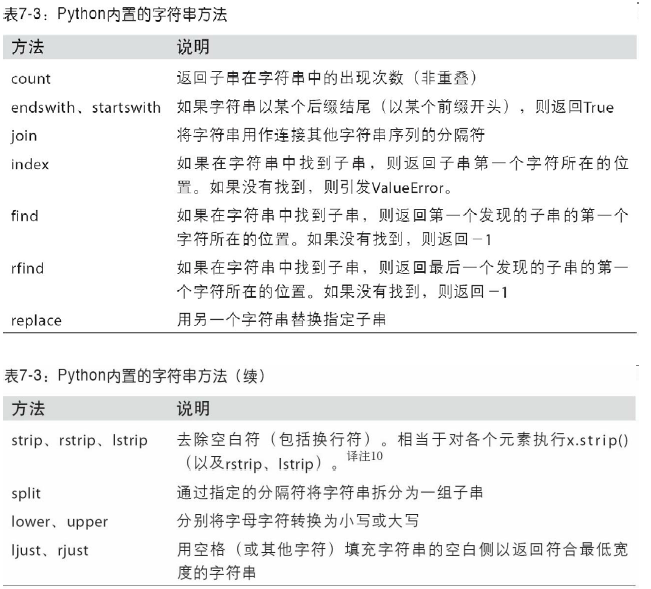

In [143]:
val = 'a,b,  guido'
val.split(',')

['a', 'b', '  guido']

In [144]:
pieces = [x.strip() for x in val.split(',')] #x.strip移除字符串首位的指定字符(默认空格和换行)
pieces

['a', 'b', 'guido']

In [145]:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [146]:
'::'.join(pieces)

'a::b::guido'

In [147]:
print('guido' in val)
print(val.index(',')) #找不到字符串会引发异常
print(val.find(':')) #找不到字符串返回-1

True
1
-1


In [148]:
val.count(',')

2

In [149]:
val.replace(',', '::')
val.replace(',', '')

'ab  guido'

#### 正则表达式 

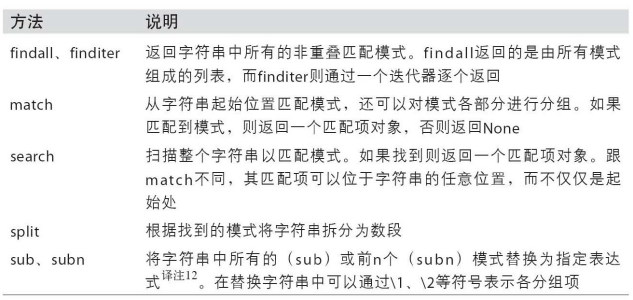

In [151]:
import re
text = "foo    bar\t baz  \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [152]:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [154]:
regex.findall(text) #匹配regex的所有样式

['    ', '\t ', '  \t']

In [155]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [156]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [158]:
m = regex.search(text)
m

<_sre.SRE_Match object; span=(5, 20), match='dave@google.com'>

In [159]:
text[m.start():m.end()]

'dave@google.com'

In [162]:
print(regex.match(text)) #match只匹配从第一个字符开始的样式

None


In [163]:
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [164]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE) #re.IGNORECASE忽略大小写

In [165]:
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [166]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [167]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



#### pandas的矢量化字符串函数 

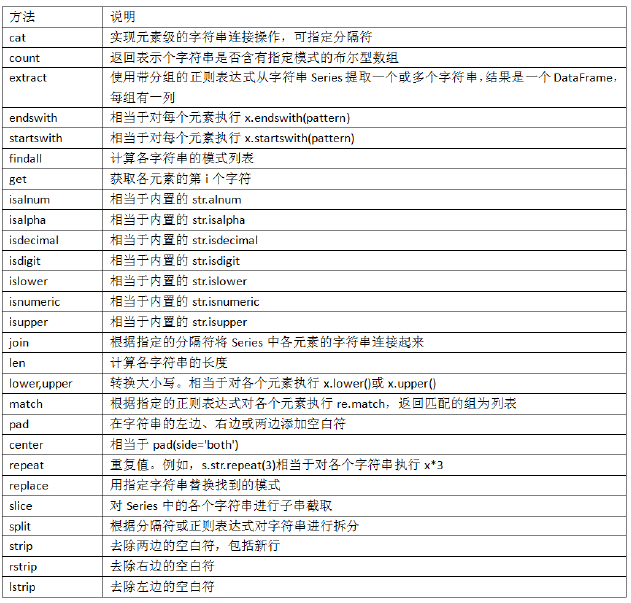

In [169]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
print(data)
data.isnull()

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object


Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [170]:
data.str.contains("gmail") #检查是否含有gmail字符串

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [173]:
print(pattern)
data.str.findall(pattern, flags=re.IGNORECASE)

([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})


Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [174]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [175]:
print(matches.str.get(1))
print(matches.str[0])

Dave    NaN
Steve   NaN
Rob     NaN
Wes     NaN
dtype: float64
Dave    NaN
Steve   NaN
Rob     NaN
Wes     NaN
dtype: float64


In [176]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object